# Image Classification

We started with making the image classification task. The first step we did was think about what we want to categorize. Eventually we decided to go with 'leaves'. After that we collected the data and made a model using fastai. We also made a keras model and compared that to the fastai one. After that we made sure to apply the ROC and AUC metrics and also to benchmark our model to the performance of Google's TeachableMachine.

We made a web app using streamlit where you can upload your own image and the model will predict which class it belongs to. Lastly, we added an API where you can send an image to and it will give back the class it belongs to.

## The Dataset

The six categories of leaves we chose to use for our classification model are leaves from birch, ash, ilex, maple, willow and oak trees. The dataset contains images of the leave in various colors, positions and images where there are clusters of the leaves or only a single leaf. There are also images of the leaves during different seasons where their colors vary from green to orange. This means that the classes have a variation of data for each leaf type.

Birch: 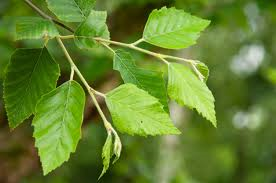 Oak: 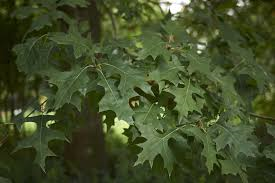 Ilex: 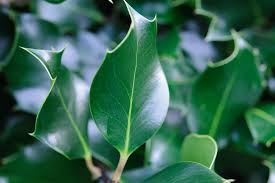 Willow: 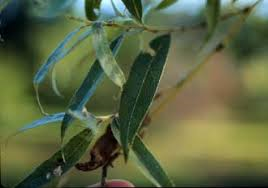 

Maple: 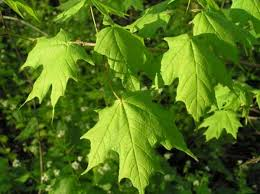 Ash: 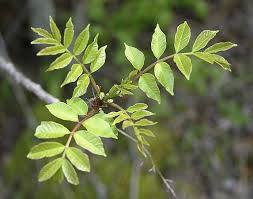

The images were scraped from Google Images. Some results were unrelated to the leaves so we went through and cleaned the data. Once cleaned we determined a good amount of images that could be fulfilled by all categories, as some leaves had more image results than the others. Once the cleaning was completed we end up with a balanced dataset with 150 images per category. 

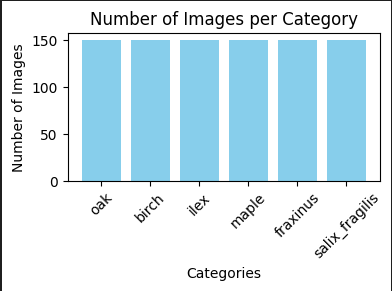

## Modeling using fastai

The data is prepared for training by using the datablock API. In the datablock we specify that the data blocks involved are images and categories. The image dataset is split into training and validation sets with the validation set being 20% of the dataset. We indicate that y, the label, will be retrieved from the parent label. This means the labels are the name of the parent directory. We set the images to have a minimum size of 460 pixels at the smallest side. The images are then augmented with the image size 224 and augmentations are done with a minimum scale of 0.75. 

In [7]:
# Define how to gather and process the data
leaves = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    # Augmentation (presizing)
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224, min_scale=0.75))

We can see that the images have been correctly split into training and validation sets.

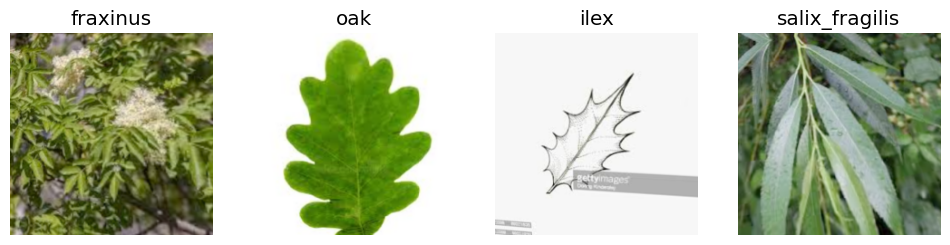

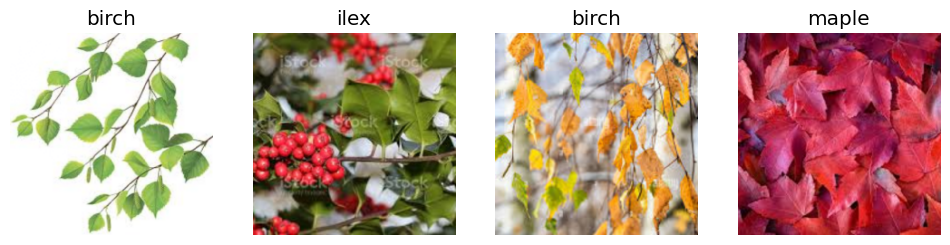

In [15]:
# Show some train and validate images
dls.train.show_batch(max_n=4, nrows=1)
dls.valid.show_batch(max_n=4, nrows=1)

#### The Model

The model we are using is a ResNet50 model. The ResNet model is a Residual network that is 50 layers deep. These layers consist of 48 convolutional layers, one MaxPool layer and an average pool layer. ResNet stacks residual blocks that skips layers which helps to solve the vanishing gradient problem. The network focuses on the important features first and then goes back for the details after. The bottleneck design reduces the number of parameters and matrix multiplications which makes the training faster for each layer. The ResNet50 model is pretrained to classify 1000 categories. The model uses the 16-bit floating point to speed up the training process. 

We fine tune the model to perform better on our specific dataset. We fine tune for 6 epochs. We set freeze epoch to 3 which means that the first three epochs the existing layers in the model will be frozen. After the initial 3 epochs the layers are gradually unfrozen to allow the model to adapt to the new dataset.  

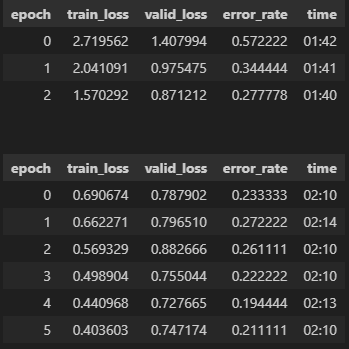

#### Evaluation

Above we can see that the model has an error rate of 0.2111. This means the accuracy of the model is approximately 78,8%. 

We can see the training loss is decreasing at a good pace. The validation loss is also mostly decreasing but at a much slower rate.

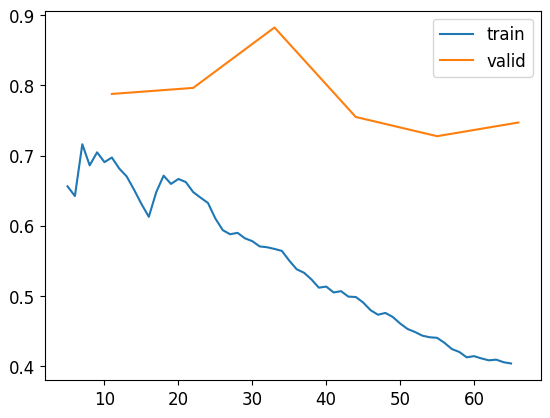

The confusion matrix for the model shows that it can differentiate between the classes very well. It makes few mistakes despite our dataset containing different color variations of the data which may make them look like a different leaf. 

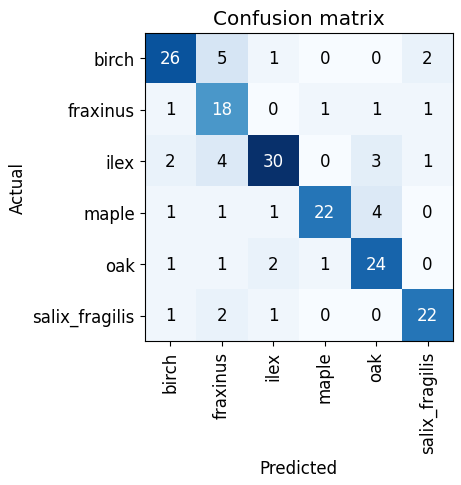

## Extra: Keras model

Our model performs pretty well. There we used FastAI to create the model. There are many other libraries and frameworks we can use to use transfer learning to create a model. Now we will use the same data set to create a computer vision model with Keras. The dataset is split the same way as before with an 80/20 split for training and validation.

Here we pick the ResNet50V2 pretrained model. We use the imagenet database as weights for the model and set the input shape to 224,224,3. This input shape is required to use the imagenet. The top layer is not included, as we will be defining our own top layer. Once defined we ensure that the already trained layers in the model are frozen, so they are not affected by our additions. Some extra layers are added with batch normalization. A convolution layer, max pooling, flatten and some dense layers. Funally we add our own top layer where we specify there are 6 possible classes and we use the softmax activation function. For the optimize we use ADAM and specify our loss function to be categorical crossentropy.

The next step is doing some image augmentations. We do heigh and width shift, zoom, channel shift and brightness range augmentations.

The model trains for 5 epochs. The result shows us that the model has a high accuracy, but that the validation accuracy is quite low. This implies that the model may perform poorly on data it has not seen before.

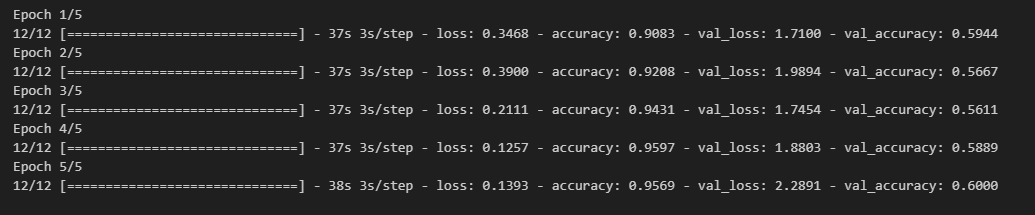

#### Evaluation

If we look at the confusion matrix we can see that the model struggles with some classes despite the high accuracy. The validation accuracy was low and we can see this reflected in the errors the model makes. It mostly struggles with classifying Fraxinus, Ilex and Maple. It performs pretty well on Oak and Salix fragilis.

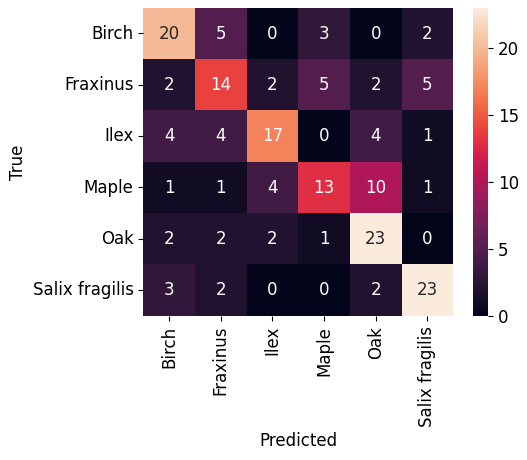

If we now look back at our fastai model we can see that this model performs better despite the lower accuracy score.

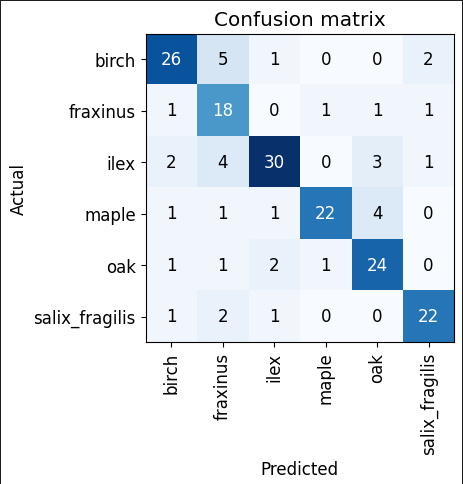

## Extra: ROC and AUC

We can see the performance of the model through the ROC and AUC curves. Since we are not doing binary classification we have to do a one-vs-rest strategy. It trains one binary classifier for each class. The ROC curve is made by plotting the  true positive rates against the false positive rates within different thresholds. The AUC is the area under the curve, and a higher AUC score means a better perfoming model. 

The plot shows us that our model performs very good on birch, ilex, maple, and salix fragilis (willow). The faxinus (ash) and oak perform slightly worse but still have a good performance.

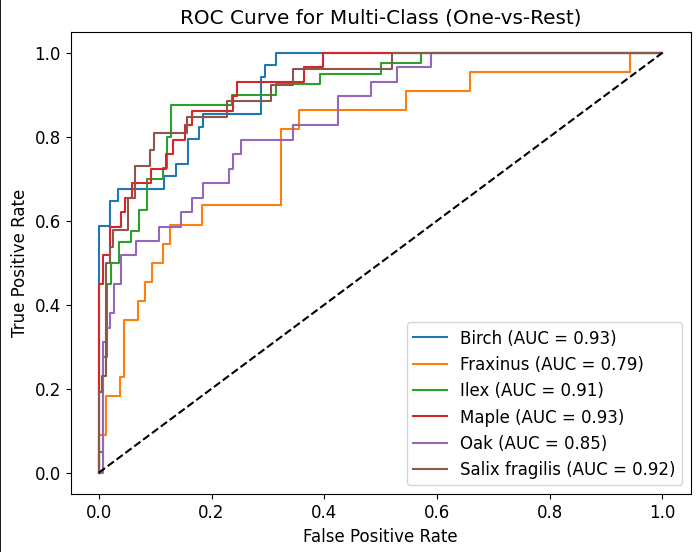

## Extra: Benchmark Google Teachable Machine

Google Teachable machine allows you to make machine learning models based on a pretrained model. We placed our dataset in Google Teachable Machine to see how our model would hold up against the one created. With the Google Teachable Machine's confusion matrix on the left, and our FastAI on the right we can compare how the models perform. We see there is not a large difference between the two models. Both models perform quite well and there is not a large difference between the two. The two models make about the same errors per class with only a variation of about 1-2 more errors. This variation goes in favour of each model depending on the class.

<img src="./ConfMatrixGTM.png"> 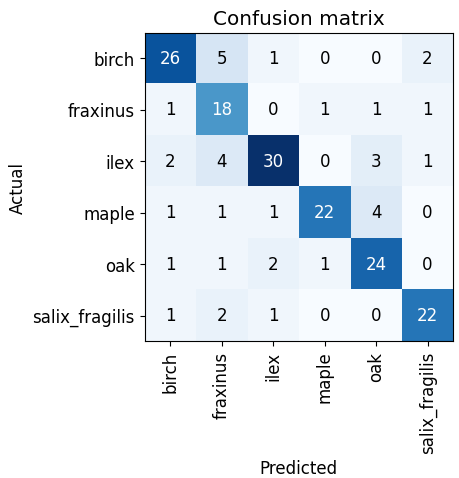

If we look at the accuracy per class and compare it to our AUC and ROC curve scores we can see that the accuracy per class is better for our model, where the lowest score was fraxinus with 0.79 accuracy. 

<img src="./AccuracyGTM.png">


Here we can see the training and validation loss for the teachable machine model.

<img src="./LossFunctionGTM.png">

## Streamlit

Url to our Streamlit app: https://treeleaves.streamlit.app/

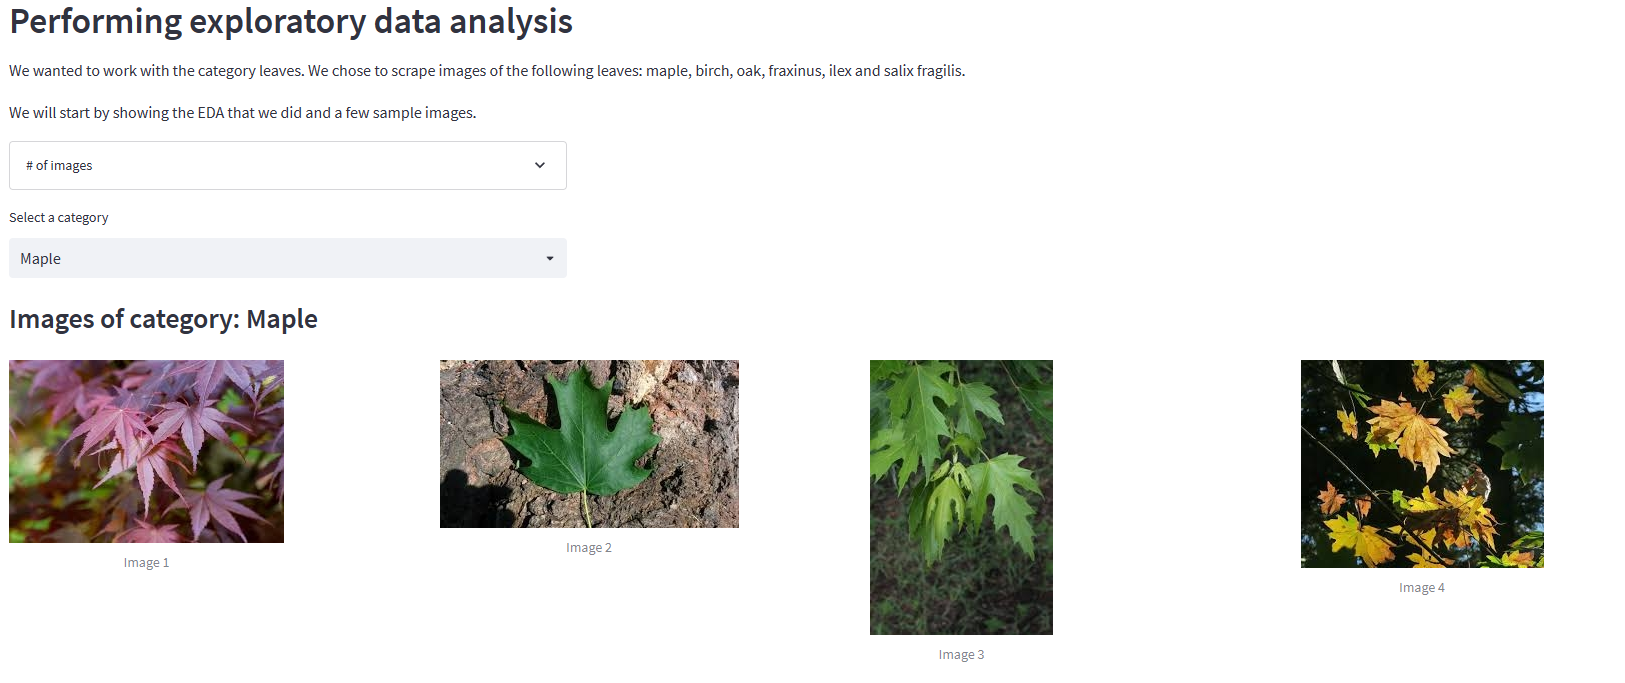

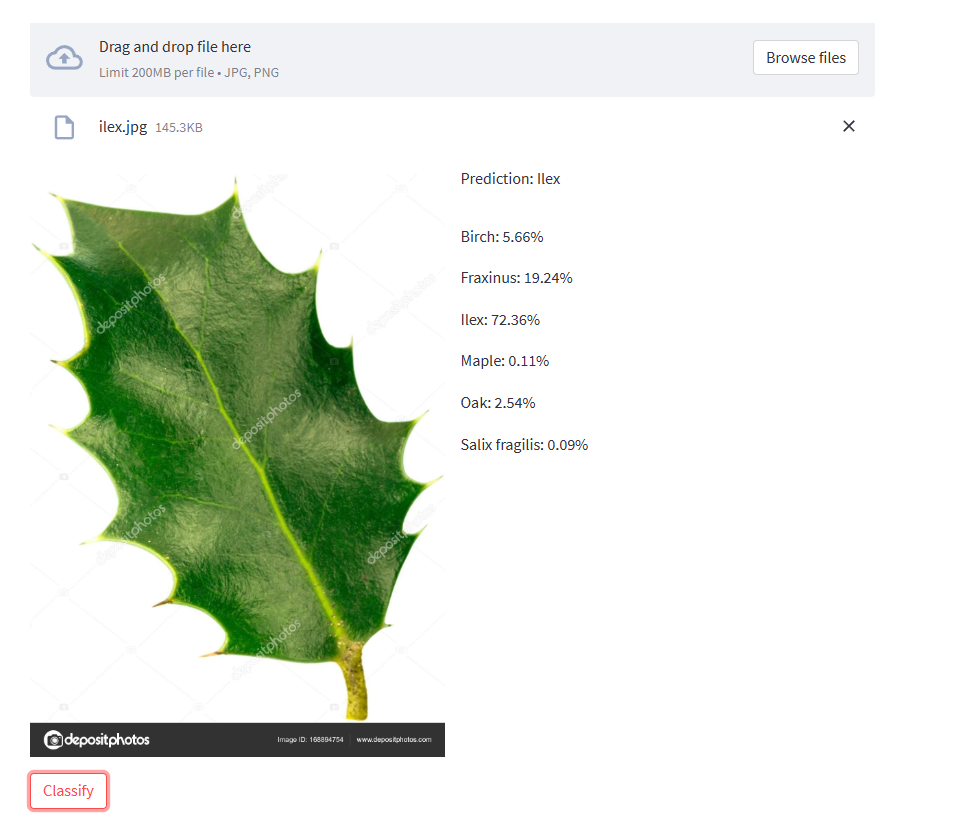

## Extra: train model in streamlit

We made an app where the model parameters can be changed by the user and a new model be trained. It runs and starts the training, but is too computationally heavy to fully complete. The code can be found in the image-classification-final notebook for review.

Images of the streamlit app:

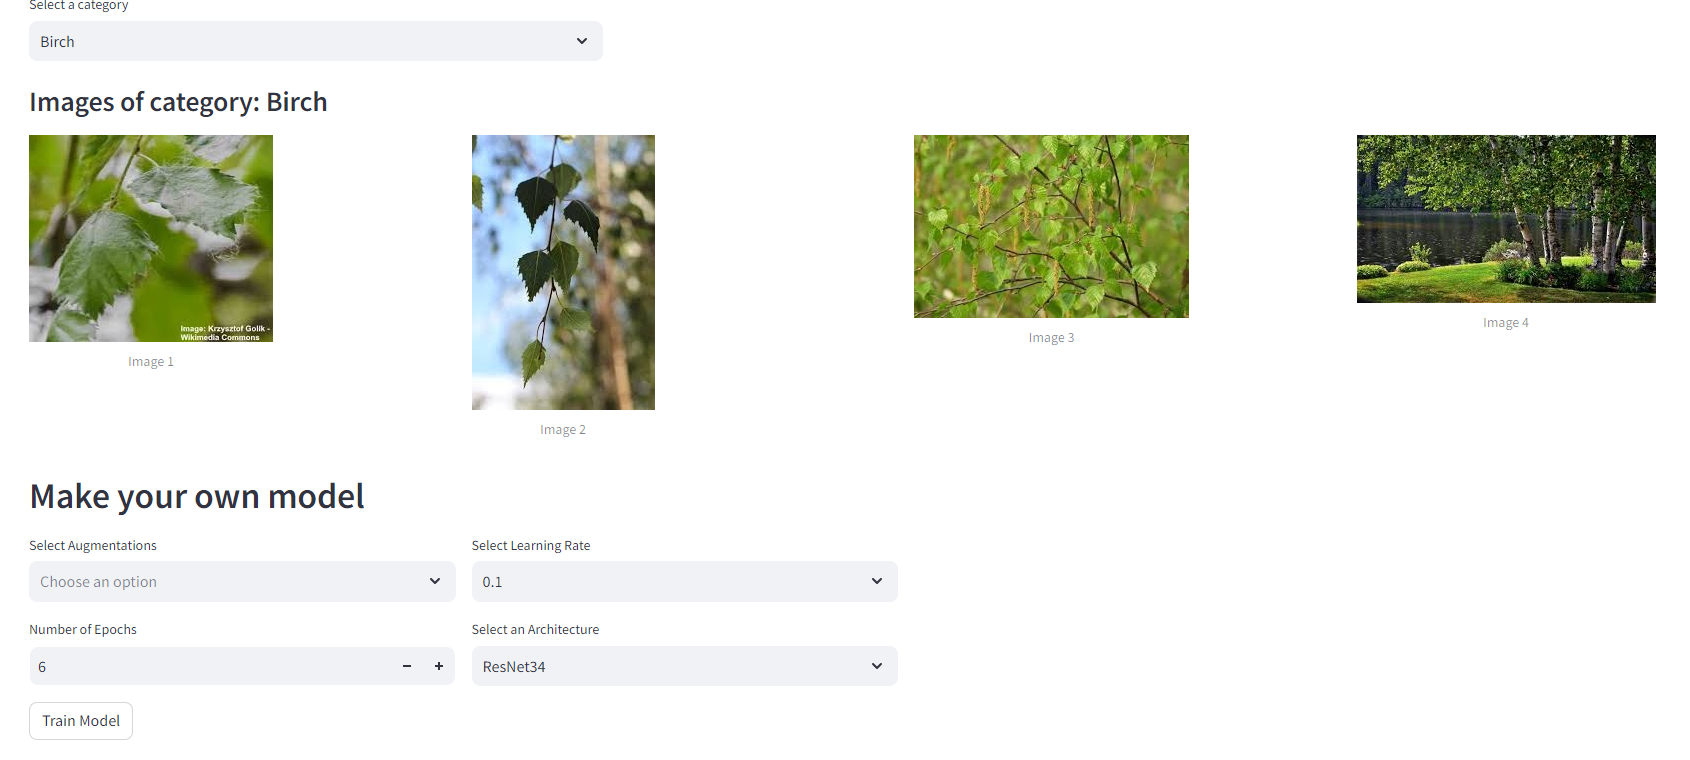

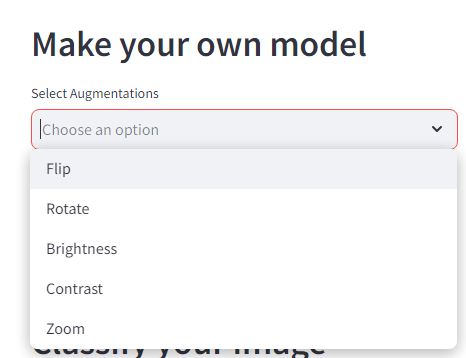 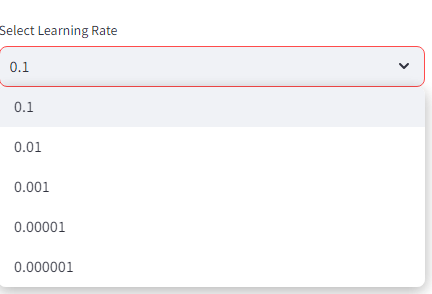 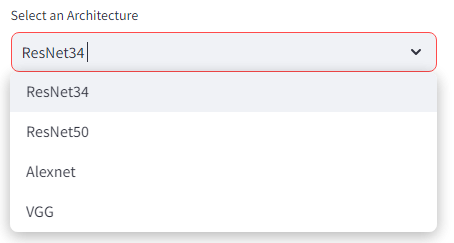

## Extra: API

The API was made in FastAPI. The API takes an image that is either in jpg, jpeg or png format. The API checks if the file sent is an image, and then if it is a png or jpg/jpeg file. The image is sent to the model for prediction and the prediction results are returned. We take this image that is not in the dataset from before and send it to the API through curl. As we can see the API returns Maple as the result. 

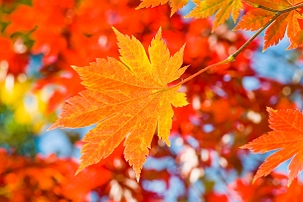

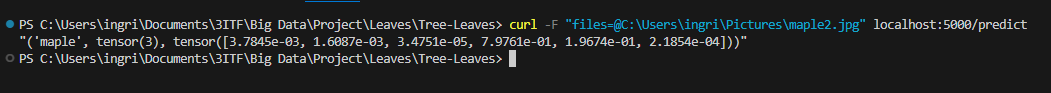

# Classification Leaves Code
The full code can be found in image-classification-final.ipynb.

Streamlit code can be found in basicStreamlit/streamlitBasic.py for the standard streamlit app and extraStreamlit/streamlitAdvanced.py for the extra where the model can be trained.

The api code can be found in api.py.

## Conclusion

To conclude, we didn't have many problems with this part of the assignment. The only problem we encountered was for the advanced streamlit where the user can train his/her own model. We were unable to solve that since it just takes too long to train and it too heavy. We are proud of our basic streamlit app, the api and how good our model is.